In [1]:
## Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.api import VAR
import math

## Data prep

df_input = pd.read_csv("df_cleaned_both_directions_interpolated.csv")      # CSV INPUT

df_input["Datum"] = pd.to_datetime(df_input["Datum"], dayfirst=True)

df_input = df_input.set_index("Datum")

## Train/Test split

df_train = df_input[ :"12.31.2003"]     # TRAIN DATEN BIS " "
#df_test = df_input["01.01.2003":]       # TEST DATEN VON " "

## VAR fit

model = VAR(df_train, freq="D")
results = model.fit(351)        # MODEL FIT (LAG)
lag = results.k_ar

## VAR forecast

forecast = results.forecast(df_train.values[-lag:], steps=365)        # 365 STEPS FORECAST

## RMSE/MEANS/VARIANCE

from sklearn.metrics import mean_squared_error
#RMSE = mean_squared_error(df_test[0:365], forecast, squared=False)
forecast_to_array = np.array(forecast)

#print("RMSE:      [",RMSE,"]")
print()
print("MEANS:")
print()
print("FORECAST: ",results.mean())
print("    REAL:  [ 3.67538293 10.4809628  32.21740044  0.55346827  9.53884026]")
print()
forecast_means_real = [3.67538293,10.4809628,32.21740044,0.55346827,9.53884026]
diff_means = forecast_means_real / results.mean() * 100
print("DIFF in %:",diff_means,"  ---- > 100 ist Gut")
print()
print("VARIANCES:")
print()
print("FORECAST: ",np.var(forecast_to_array, axis=0))
print("REAL:      [ 3.25649466 24.84346691  1.11161782  0.51352747 76.51075248]")
forecast_variance_pred = np.var(forecast_to_array, axis=0)
forecast_variance_real = [3.25649466,24.84346691,1.11161782,0.51352747,76.51075248]
diff_var = forecast_variance_real / forecast_variance_pred * 100
print()
print("DIFF in %:",diff_var,"  ---- > 100 ist Gut")


MEANS:

FORECAST:  [ 3.28614798 10.05105462 32.11288218  0.87313819 14.96627632]
    REAL:  [ 3.67538293 10.4809628  32.21740044  0.55346827  9.53884026]

DIFF in %: [111.84471774 104.27724444 100.32547143  63.38839309  63.73556159]   ---- > 100 ist Gut

VARIANCES:

FORECAST:  [ 0.83844664 23.03221273  0.14751287  0.40841221 55.19942209]
REAL:      [ 3.25649466 24.84346691  1.11161782  0.51352747 76.51075248]

DIFF in %: [388.39617453 107.86400421 753.57345955 125.73754159 138.60788679]   ---- > 100 ist Gut


In [2]:
df_result = pd.DataFrame(forecast_to_array)
df_result = df_result.rename(columns={df_result.columns[0]: 'SECCI'})
df_result = df_result.rename(columns={df_result.columns[1]: 'Temperatur'})
df_result = df_result.rename(columns={df_result.columns[2]: 'Salinität'})
df_result = df_result.rename(columns={df_result.columns[3]: 'NO2'})
df_result = df_result.rename(columns={df_result.columns[4]: 'NO3'})

df_result["Datum"] = pd.date_range(start='01.01.2004', periods=len(df_result), freq='D')
df_result["Datum"] = pd.to_datetime(df_result["Datum"], dayfirst=True)
df_result = df_result.set_index("Datum")
df_result

,SECCI,Temperatur,Salinität,NO2,NO3
Datum,,,,,
2004-01-01,1.500660,6.599678,31.729014,2.247186,3.813369
2004-01-02,1.617067,6.553455,31.864348,2.254631,4.762481
2004-01-03,1.668531,6.272136,31.894738,2.246730,6.381333
2004-01-04,1.856478,6.178077,31.938837,2.266910,6.786064
2004-01-05,1.643060,6.088521,32.111425,2.235132,5.912918
...,...,...,...,...,...
2004-12-26,2.728168,6.651142,32.897712,1.528903,7.254005
2004-12-27,2.789803,6.601969,32.824257,1.553184,7.488319
2004-12-28,2.765123,6.612436,32.826551,1.561029,7.502972


<AxesSubplot:xlabel='Datum'>

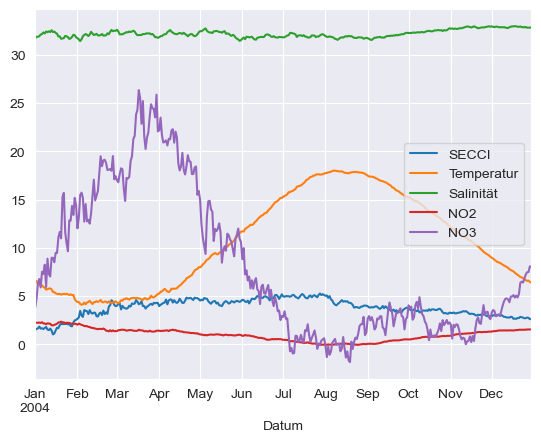

In [8]:
#df_concat = df_train.append(df_result)
#df_concat.plot()
df_result.plot()

In [4]:
df_test_2003 = df_test[0:365]

ax = df_result.plot()
df_test_2003.plot(ax=ax)

plt.show()

NameError: name 'df_test' is not defined

In [ ]:
fig, ax = plt.subplots()

# plot the dataframes on the same axis

# plot the dataframes on the same axis
ax.plot(df_result.index, df_result['SECCI'], label='PRED')
ax.plot(df_test_2003.index, df_test_2003['SECCI'], label='REAL')

# set axis labels and legend
ax.set_xlabel('Datum')
ax.set_ylabel('SECCI')
ax.legend()

fig, ax = plt.subplots()
# plot the dataframes on the same axis
ax.plot(df_result.index, df_result['Temperatur'], label='PRED')
ax.plot(df_test_2003.index, df_test_2003['Temperatur'], label='REAL')

# set axis labels and legend
ax.set_xlabel('Datum')
ax.set_ylabel('Temperatur')
ax.legend()

fig, ax = plt.subplots()

# plot the dataframes on the same axis

# plot the dataframes on the same axis
ax.plot(df_result.index, df_result['Salinität'], label='PRED')
ax.plot(df_test_2003.index, df_test_2003['Salinität'], label='REAL')

# set axis labels and legend
ax.set_xlabel('Datum')
ax.set_ylabel('Salinität')
ax.legend()

fig, ax = plt.subplots()
# plot the dataframes on the same axis
ax.plot(df_result.index, df_result['NO2'], label='PRED')
ax.plot(df_test_2003.index, df_test_2003['NO2'], label='REAL')

# set axis labels and legend
ax.set_xlabel('Datum')
ax.set_ylabel('NO2')
ax.legend()

fig, ax = plt.subplots()
# plot the dataframes on the same axis
ax.plot(df_result.index, df_result['NO3'], label='PRED')
ax.plot(df_test_2003.index, df_test_2003['NO3'], label='REAL')

# set axis labels and legend
ax.set_xlabel('Datum')
ax.set_ylabel('NO3')
ax.legend()
# show the plot
#plt.show()

In [3]:
evaluation_df = pd.read_csv("bbdc_2023_AWI_data_evaluate_skeleton_student.csv", sep=';')
evaluation_df["Datum"] = pd.to_datetime(evaluation_df["Datum"], dayfirst=True)

evaluation_df = evaluation_df.set_index("Datum")
evaluation_df

,Uhrzeit,SECCI,Temperatur,Salinität,NO2,NO3,NOx
Datum,,,,,,,
NaT,NaN,Meter,°C,NaN,µmol/l,µmol/l,µmol/l
2004-01-02,7:34,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,14:10,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-06,9:05,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-07,8:30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2013-12-18,7:52,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-19,9:09,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-20,8:00,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
merged_df_2004 = pd.merge(evaluation_df, df_result, on="Datum")
merged_df_2004.drop(["SECCI_x", "Temperatur_x" , "Salinität_x","NO2_x", "NO3_x" ,"NOx"], axis = 1, inplace =True)

merged_df_2004

,Uhrzeit,SECCI_y,Temperatur_y,Salinität_y,NO2_y,NO3_y
Datum,,,,,,
2004-01-02,7:34,1.617067,6.553455,31.864348,2.254631,4.762481
2004-01-05,14:10,1.643060,6.088521,32.111425,2.235132,5.912918
2004-01-06,9:05,1.685219,6.120648,32.167613,2.302919,7.537157
2004-01-07,8:30,1.602151,5.974169,32.337142,2.176948,7.308833
2004-01-08,9:00,1.702518,5.876904,32.223412,2.178462,8.268010
...,...,...,...,...,...,...
2004-12-20,7:00,2.743930,7.212191,32.924085,1.496577,4.874997
2004-12-21,8:32,2.742129,7.108264,32.915009,1.529489,5.232659
2004-12-27,13:07,2.789803,6.601969,32.824257,1.553184,7.488319


In [5]:
merged_df_2004.mean()

/var/folders/gp/8l9268717m5fnd6hgnjf7x_m0000gn/T/ipykernel_67196/1014096981.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df_2004.mean()


SECCI_y          3.821063
Temperatur_y    10.845538
Salinität_y     32.203677
NO2_y            0.994492
NO3_y            7.707745
dtype: float64

In [6]:
df_train_2011 = df_input[ :"12.31.2010"]     # TRAIN DATEN BIS " "
#df_test = df_input["01.01.2003":]       # TEST DATEN VON " "

## VAR fit

model = VAR(df_train_2011)
results = model.fit(351)        # MODEL FIT (LAG)
lag = results.k_ar

## VAR forecast

forecast = results.forecast(df_train.values[-lag:], steps=1095)        # 365 STEPS FORECAST

## RMSE/MEANS/VARIANCE

from sklearn.metrics import mean_squared_error
#RMSE = mean_squared_error(df_test[0:365], forecast, squared=False)
forecast_to_array = np.array(forecast)
df_result_2011 = pd.DataFrame(forecast_to_array)
df_result_2011 = df_result_2011.rename(columns={df_result_2011.columns[0]: 'SECCI'})
df_result_2011 = df_result_2011.rename(columns={df_result_2011.columns[1]: 'Temperatur'})
df_result_2011 = df_result_2011.rename(columns={df_result_2011.columns[2]: 'Salinität'})
df_result_2011 = df_result_2011.rename(columns={df_result_2011.columns[3]: 'NO2'})
df_result_2011 = df_result_2011.rename(columns={df_result_2011.columns[4]: 'NO3'})

df_result_2011["Datum"] = pd.date_range(start='01.01.2011', periods=len(df_result_2011), freq='D')
df_result_2011["Datum"] = pd.to_datetime(df_result_2011["Datum"], dayfirst=True)
df_result_2011 = df_result_2011.set_index("Datum")
df_result_2011.mean()

/Users/bjarne/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SECCI          3.610015
Temperatur    10.481805
Salinität     32.183003
NO2            0.849601
NO3            9.483912
dtype: float64

In [7]:
merged_df_2011 = pd.merge(evaluation_df, df_result_2011, on="Datum")
merged_df_2011.drop(["SECCI_x", "Temperatur_x" , "Salinität_x","NO2_x", "NO3_x" ,"NOx"], axis = 1, inplace =True)

merged_df_2011

,Uhrzeit,SECCI_y,Temperatur_y,Salinität_y,NO2_y,NO3_y
Datum,,,,,,
2011-01-03,9:10,1.583678,6.472839,31.921483,2.440559,6.410905
2011-01-04,9:20,1.747883,6.213539,31.758727,2.355295,8.566585
2011-01-05,8:25,1.533556,6.205774,32.009467,2.374308,7.851314
2011-01-06,8:35,1.603672,6.151263,31.992411,2.395997,9.041850
2011-01-07,9:10,1.500396,5.994855,32.058119,2.270796,9.716384
...,...,...,...,...,...,...
2013-12-18,7:52,2.278018,7.151897,32.801348,1.328532,11.680482
2013-12-19,9:09,2.274155,7.054404,32.804390,1.331587,11.871329
2013-12-20,8:00,2.272916,6.958818,32.807290,1.333308,12.036688


In [8]:
merged_df_2004_and_2011_and_2012 = merged_df_2004.append(merged_df_2011)
merged_df_2004_and_2011_and_2012

/var/folders/gp/8l9268717m5fnd6hgnjf7x_m0000gn/T/ipykernel_67196/1767184143.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df_2004_and_2011_and_2012 = merged_df_2004.append(merged_df_2011)


,Uhrzeit,SECCI_y,Temperatur_y,Salinität_y,NO2_y,NO3_y
Datum,,,,,,
2004-01-02,7:34,1.617067,6.553455,31.864348,2.254631,4.762481
2004-01-05,14:10,1.643060,6.088521,32.111425,2.235132,5.912918
2004-01-06,9:05,1.685219,6.120648,32.167613,2.302919,7.537157
2004-01-07,8:30,1.602151,5.974169,32.337142,2.176948,7.308833
2004-01-08,9:00,1.702518,5.876904,32.223412,2.178462,8.268010
...,...,...,...,...,...,...
2013-12-18,7:52,2.278018,7.151897,32.801348,1.328532,11.680482
2013-12-19,9:09,2.274155,7.054404,32.804390,1.331587,11.871329
2013-12-20,8:00,2.272916,6.958818,32.807290,1.333308,12.036688


In [9]:
merged_df_2004_and_2011_and_2012.mean()

/var/folders/gp/8l9268717m5fnd6hgnjf7x_m0000gn/T/ipykernel_67196/1307778595.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df_2004_and_2011_and_2012.mean()


SECCI_y          3.683682
Temperatur_y    10.634692
Salinität_y     32.176706
NO2_y            0.877679
NO3_y            8.992264
dtype: float64

In [ ]:
merged_df_2004_and_2011_and_2012.plot()

In [10]:
merged_df_2004_and_2011_and_2012["NO3_y"][merged_df_2004_and_2011_and_2012["NO3_y"] < 0] = 0

merged_df_2004_and_2011_and_2012["NOx"] = merged_df_2004_and_2011_and_2012["NO2_y"] + merged_df_2004_and_2011_and_2012["NO3_y"]



VAR_FULL_PREDICTION = merged_df_2004_and_2011_and_2012

VAR_FULL_PREDICTION

/var/folders/gp/8l9268717m5fnd6hgnjf7x_m0000gn/T/ipykernel_67196/1900750622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_2004_and_2011_and_2012["NO3_y"][merged_df_2004_and_2011_and_2012["NO3_y"] < 0] = 0


,Uhrzeit,SECCI_y,Temperatur_y,Salinität_y,NO2_y,NO3_y,NOx
Datum,,,,,,,
2004-01-02,7:34,1.617067,6.553455,31.864348,2.254631,4.762481,7.017112
2004-01-05,14:10,1.643060,6.088521,32.111425,2.235132,5.912918,8.148051
2004-01-06,9:05,1.685219,6.120648,32.167613,2.302919,7.537157,9.840076
2004-01-07,8:30,1.602151,5.974169,32.337142,2.176948,7.308833,9.485782
2004-01-08,9:00,1.702518,5.876904,32.223412,2.178462,8.268010,10.446472
...,...,...,...,...,...,...,...
2013-12-18,7:52,2.278018,7.151897,32.801348,1.328532,11.680482,13.009015
2013-12-19,9:09,2.274155,7.054404,32.804390,1.331587,11.871329,13.202916
2013-12-20,8:00,2.272916,6.958818,32.807290,1.333308,12.036688,13.369996


In [11]:
VAR_FULL_PREDICTION.mean()

/var/folders/gp/8l9268717m5fnd6hgnjf7x_m0000gn/T/ipykernel_67196/2391426374.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  VAR_FULL_PREDICTION.mean()


SECCI_y          3.683682
Temperatur_y    10.634692
Salinität_y     32.176706
NO2_y            0.877679
NO3_y            9.009019
NOx              9.886699
dtype: float64

In [12]:
print("FORECAST: ",np.var(merged_df_2004_and_2011_and_2012, axis=0))

FORECAST:  SECCI_y          0.833399
Temperatur_y    23.229638
Salinität_y      0.159929
NO2_y            0.288328
NO3_y           56.004567
NOx             60.503947
dtype: float64


/Users/bjarne/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
VAR_FULL_PREDICTION.to_csv("VAR_FULL_PREDICTION_No_Negative.csv")